<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/HousePrice_Expectation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##【問題1】練習のために特徴量の選択

In [1]:
# GrLivArea, YearBuilt, SalePriceをそれぞれ抜き出す

import pandas as pd

# データセットの読み込み
try:
    df = pd.read_csv('/train.csv')
except FileNotFoundError:
    print("ファイルが見つかりません。ファイルパスを確認してください。")
    exit()

# GrLivArea, YearBuilt, SalePrice のみを抽出
selected_features = df[['GrLivArea', 'YearBuilt', 'SalePrice']]

# 抽出結果を表示
print(selected_features.head())

   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000


##【問題2】線形回帰による推定と評価

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 欠損値の確認と処理
print(selected_features.isnull().sum())

# 欠損値を含む行を削除
selected_features.dropna(inplace=True)


# 特徴量 (X) と目的変数 (y) に分割
X = selected_features[['GrLivArea', 'YearBuilt']]
y = selected_features['SalePrice']

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # test_size を調整

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


<ipython-input-2-37e01c2820f8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.dropna(inplace=True)


In [3]:
# 線形回帰モデルのインスタンスを作成
model = LinearRegression()

# モデルを訓練データで学習
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 平均二乗誤差 (MSE) を計算して評価
mse = mean_squared_error(y_test, y_pred)
print(f"平均二乗誤差 (MSE): {mse}")

# 回帰係数と切片を表示
print(f"回帰係数: {model.coef_}")
print(f"切片: {model.intercept_}")

平均二乗誤差 (MSE): 2942066921.6721087
回帰係数: [  98.84636812 1033.99155545]
切片: -2007211.1817037815


In [4]:
####決定係数 (R^2) を計算して評価することもできそう
r2 = model.score(X_test, y_test)
print(f"決定係数 (R^2): {r2}")

決定係数 (R^2): 0.5739746827678706


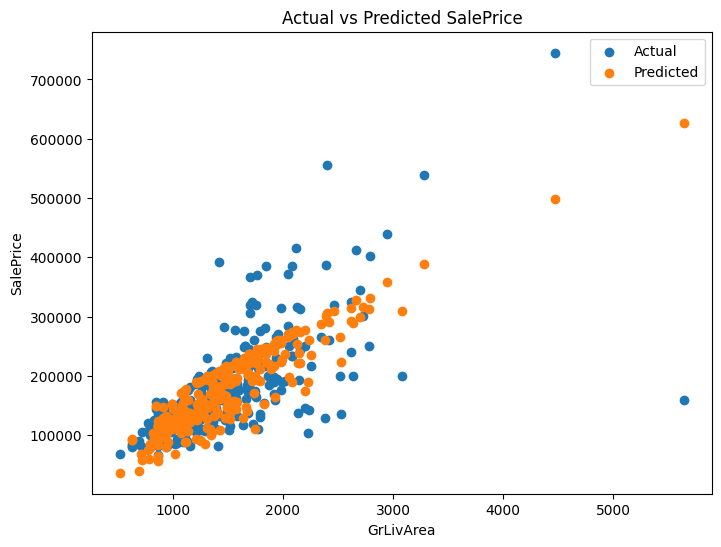

In [5]:
# 横軸にある特徴量・縦軸に推測した住宅価格

import matplotlib.pyplot as plt

# テストデータを用いて予測値を算出
y_pred = model.predict(X_test)

# 散布図を描画
plt.figure(figsize=(8, 6))
plt.scatter(X_test['GrLivArea'], y_test, label='Actual')  # 実測値
plt.scatter(X_test['GrLivArea'], y_pred, label='Predicted')  # 予測値
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

##【問題3】手法の比較

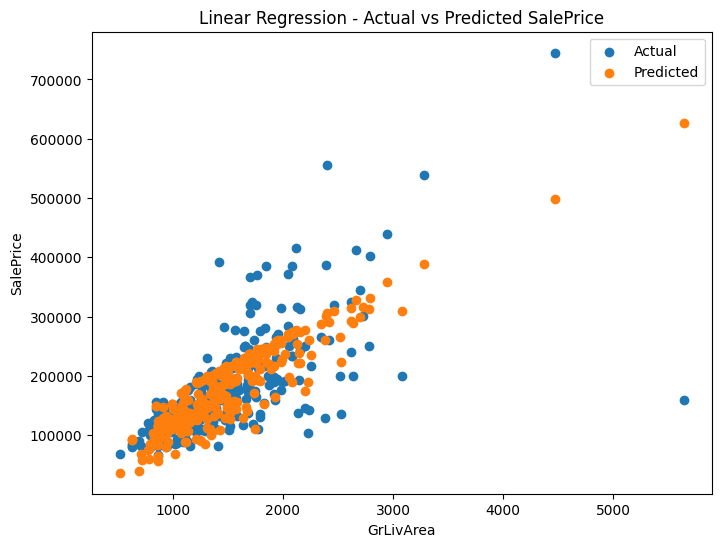

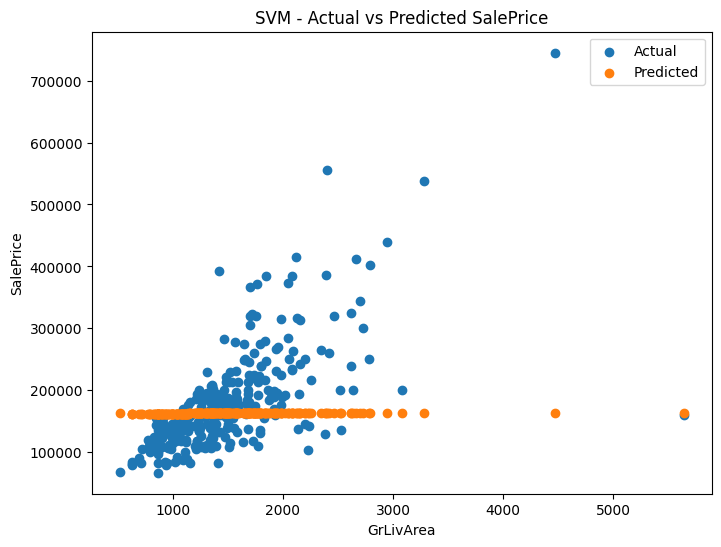

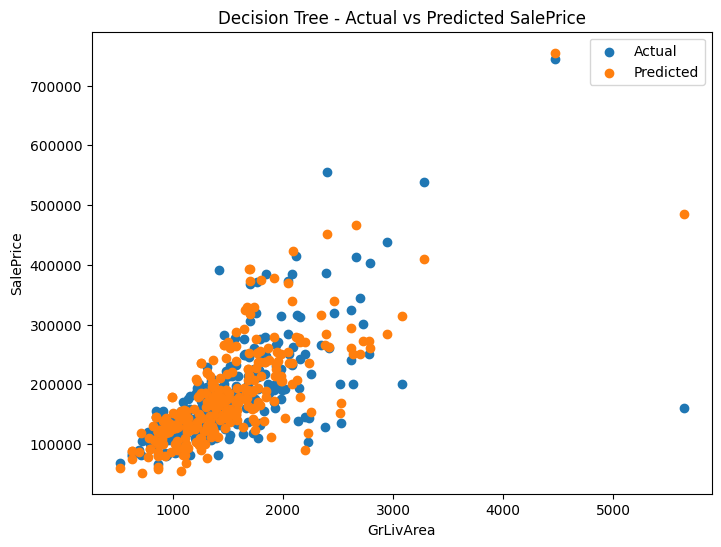

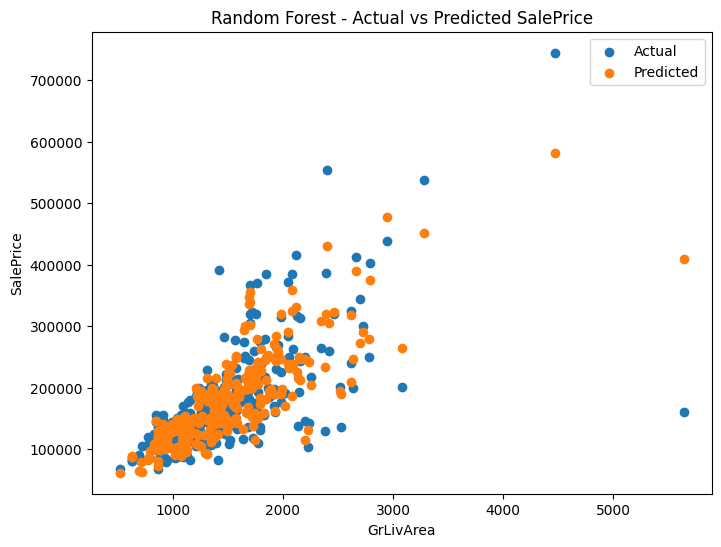

,Model,MSE,R^2
0,Linear Regression,2.942067e+09,0.573975
1,SVM,7.235024e+09,-0.047666
2,Decision Tree,3.267470e+09,0.526855
3,Random Forest,1.849205e+09,0.732226


In [7]:
# 線形回帰・SVM・決定木・ランダムフォレストの手法比較

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = selected_features[['GrLivArea', 'YearBuilt']]
y = selected_features['SalePrice']

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # test_size を調整

models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['GrLivArea'], y_test, label='Actual')
    plt.scatter(X_test['GrLivArea'], y_pred, label='Predicted')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.title(f'{name} - Actual vs Predicted SalePrice')
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R^2'])
results_df

各推定手法を比較すると、今回抽出したデータの中では、ランダムフォレストがどちらの指標値でも良い値を示していた。

線形回帰・決定木・ランダムフォレストは散布図がy軸方向にも広く分散しており形が似ているのに対し、SVMのみどのGrLivAreaでも同じSalePriceの値で一直線上にならんでしまっている。
これを指標値で見ても、SVMのみ決定計数が負の値となってしまい、MSEも他の手法と大きな差を空けて長くなってしまっている。

##【問題4】他の特徴量も使用しての学習

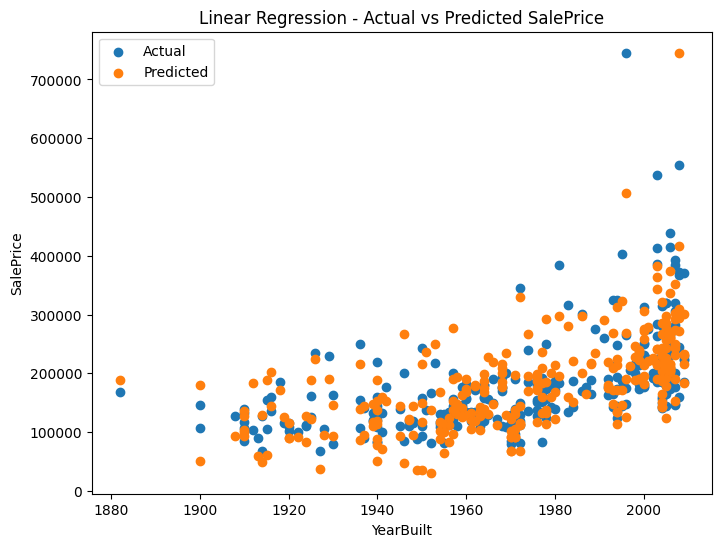

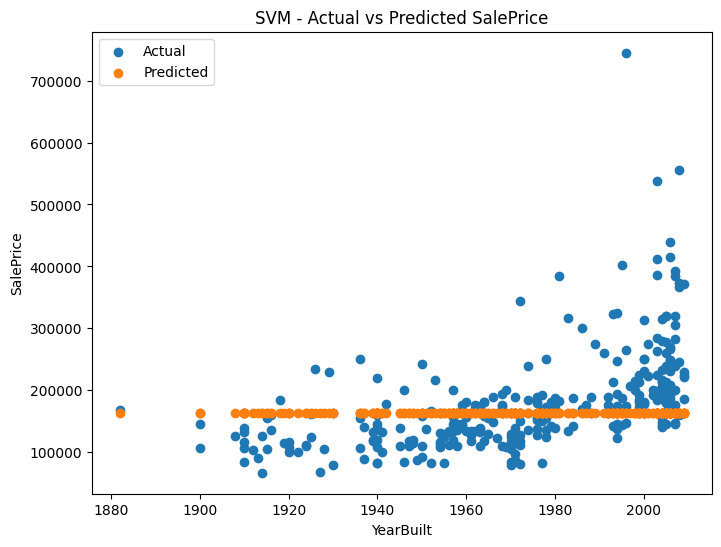

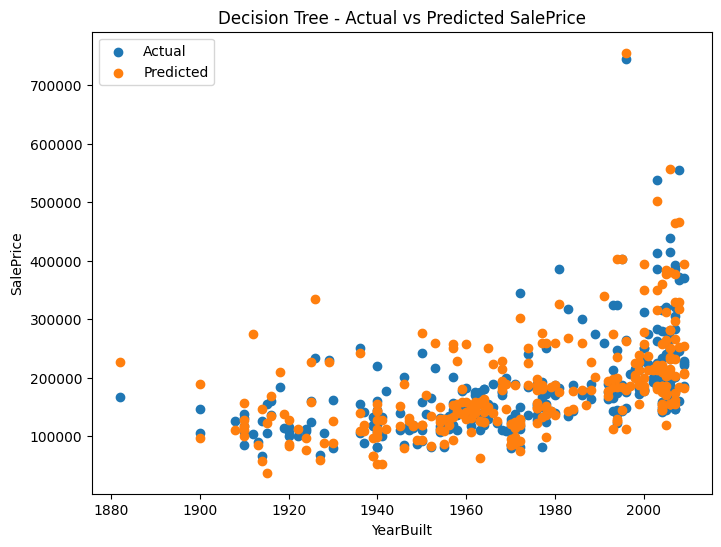

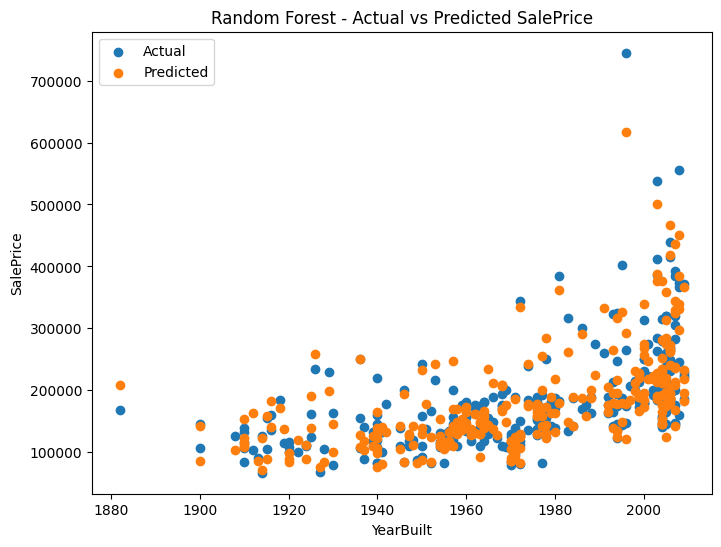

,Model,MSE,R^2
0,Linear Regression,2.554927e+09,0.630034
1,SVM,7.233123e+09,-0.047391
2,Decision Tree,1.855155e+09,0.731365
3,Random Forest,1.172837e+09,0.830168


In [9]:
# 他の特徴量を加える

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# データセットの読み込み
try:
    df = pd.read_csv('/train.csv')
except FileNotFoundError:
    print("ファイルが見つかりません。ファイルパスを確認してください。")
    exit()

# 欠損値の確認と処理
df.dropna(subset=['GrLivArea', 'YearBuilt', 'OverallQual', 'TotalBsmtSF', 'SalePrice'], inplace=True)

# 複数の主要そうな特徴量を選択
features = ['GrLivArea', 'YearBuilt', 'OverallQual', 'TotalBsmtSF']
X = df[features]
y = df['SalePrice']

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# モデルの定義
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

    # 可視化（'YearBuilt'との関係をプロット）
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['YearBuilt'], y_test, label='Actual')
    plt.scatter(X_test['YearBuilt'], y_pred, label='Predicted')
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.title(f'{name} - Actual vs Predicted SalePrice')
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R^2'])
results_df

他の特徴量でも、GrLivAreaと似たような挙動が見られる。

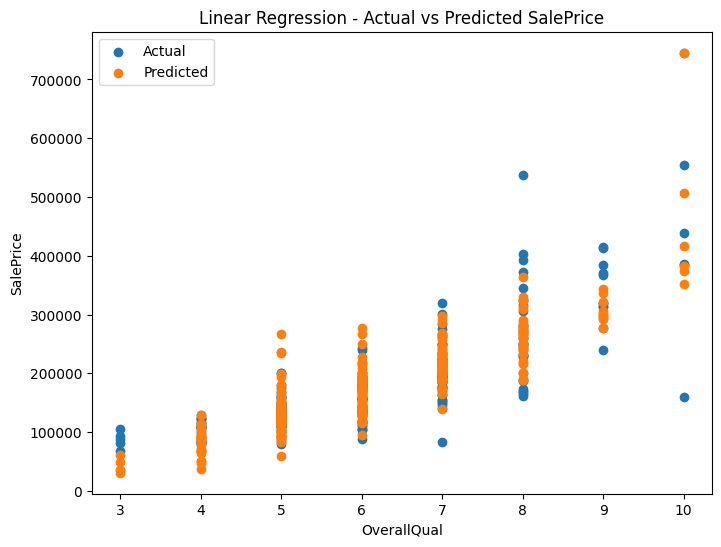

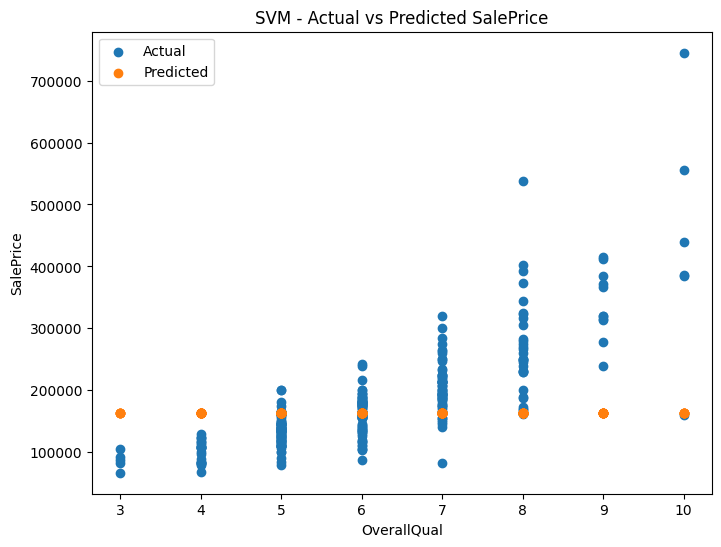

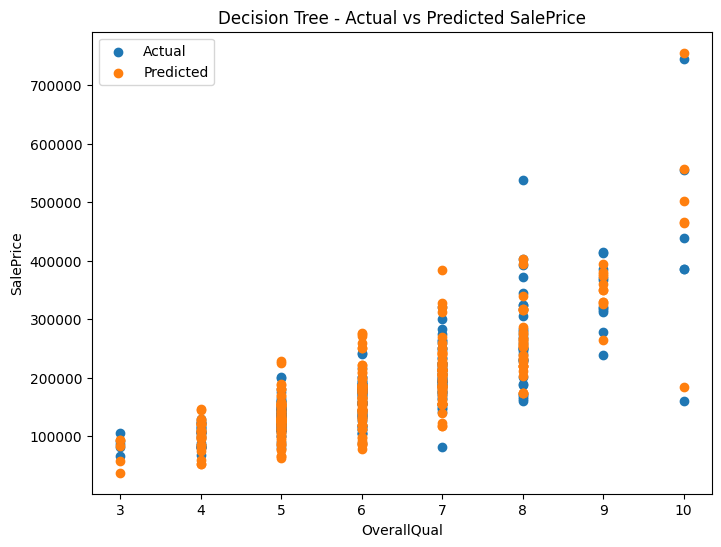

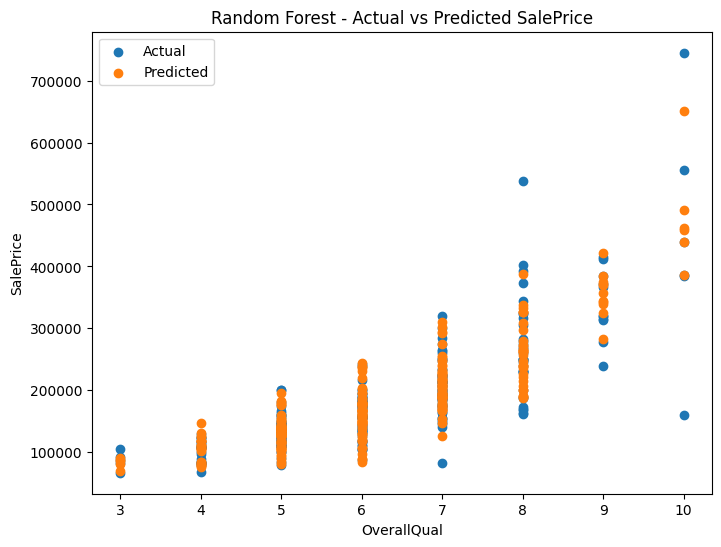

,Model,MSE,R^2
0,Linear Regression,2.554927e+09,0.630034
1,SVM,7.233123e+09,-0.047391
2,Decision Tree,1.662547e+09,0.759255
3,Random Forest,1.117233e+09,0.838219


In [10]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

    # 可視化（'OverallQual'との関係をプロット）
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['OverallQual'], y_test, label='Actual')
    plt.scatter(X_test['OverallQual'], y_pred, label='Predicted')
    plt.xlabel('OverallQual')
    plt.ylabel('SalePrice')
    plt.title(f'{name} - Actual vs Predicted SalePrice')
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R^2'])
results_df

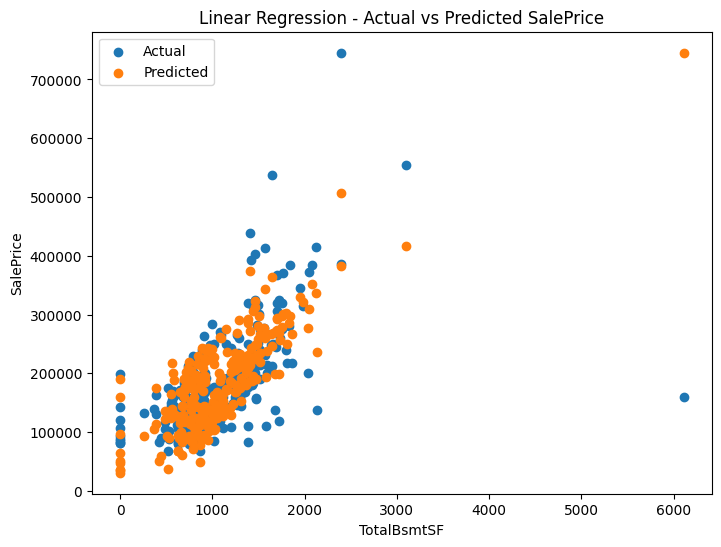

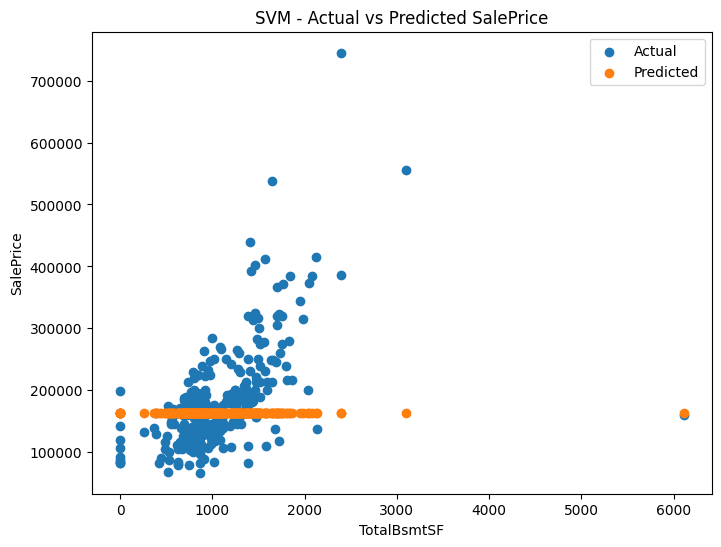

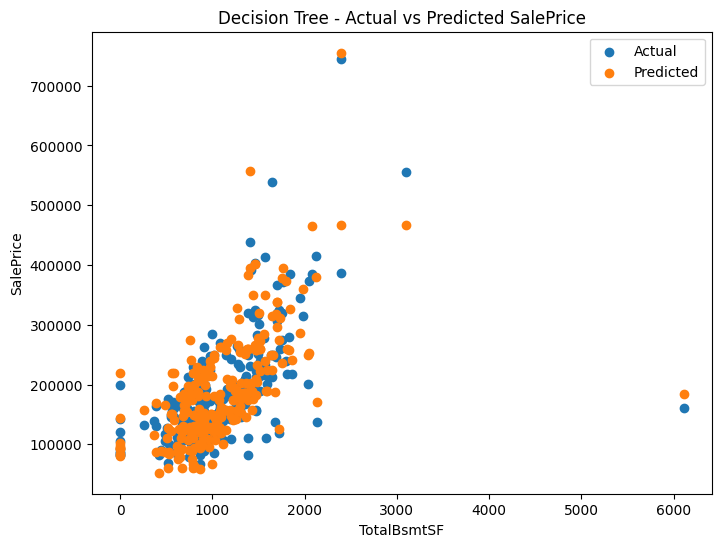

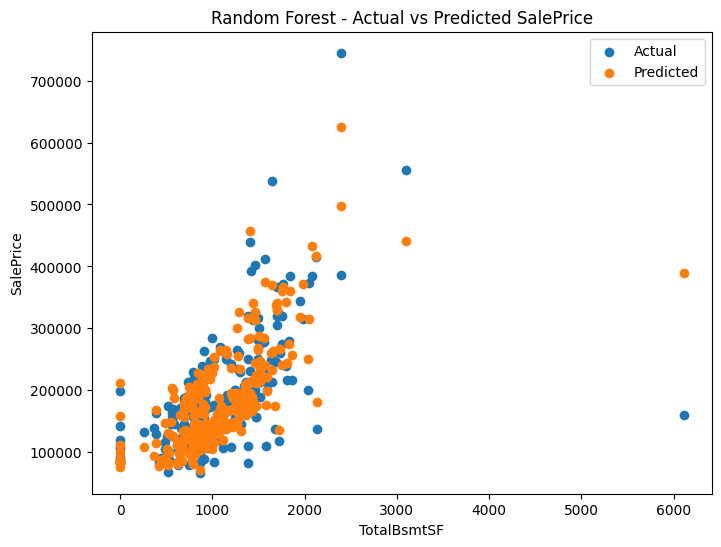

,Model,MSE,R^2
0,Linear Regression,2.554927e+09,0.630034
1,SVM,7.233123e+09,-0.047391
2,Decision Tree,1.784710e+09,0.741565
3,Random Forest,1.185630e+09,0.828315


In [11]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

    # 可視化（'TotalBsmtSF'との関係をプロット）
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['TotalBsmtSF'], y_test, label='Actual')
    plt.scatter(X_test['TotalBsmtSF'], y_pred, label='Predicted')
    plt.xlabel('TotalBsmtSF')
    plt.ylabel('SalePrice')
    plt.title(f'{name} - Actual vs Predicted SalePrice')
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R^2'])
results_df